In [1]:
import csv
import numpy as np
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
df = pd.read_csv('/Users/anna/Documents/GitHub/Lexical-Complexity-of-Speech/Get Utterances/adult_utterance.csv')

Populating the interactive namespace from numpy and matplotlib


In [2]:
child_id = [int(i) for i in list(set(df.target_child_id)) if str(i) != 'nan']
dfplot = pd.DataFrame(index = range(5, 180, 10), columns = child_id)
#dfplot.set_index(df.target_child_age)
for i in range(df.shape[0]):
    childId = df['target_child_id'].iloc[i]
    age = df['target_child_age'].iloc[i]
    numToken = df['num_tokens'].iloc[i]
    n = 0
    for j in range(len(dfplot.index) - 1):
        if (age >= dfplot.index[j]) &  (age < dfplot.index[j+1]):
            n = j
            break
    if age >= dfplot.index[len(dfplot.index) - 1]:
        n = len(dfplot.index) - 1
    if str(childId) != 'nan':
        dfplot[childId].iloc[n] = numToken 
dfplot = dfplot.fillna(0)

In [3]:
dfplot

,4108,4619,5641,4632,4123,3617,4137,4646,14966,15170,...,4572,8157,4068,4585,5609,3565,4081,4602,4091,5617
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,1,0,...,0,0,0,5,0,0,0,0,0,0
25,0,0,0,0,0,0,0,0,0,0,...,10,0,0,0,0,0,0,0,0,0
35,0,0,1,12,0,2,0,8,0,8,...,0,0,0,0,0,0,0,3,0,8
45,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,7,0,0,0,0,1
55,6,5,0,0,1,0,6,0,0,0,...,0,0,2,0,0,0,2,0,11,0
65,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
85,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(dfplot)
df_normalized = pd.DataFrame(np_scaled)
df_normalized

,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,130,131
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
3,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.125
5,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.000
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000


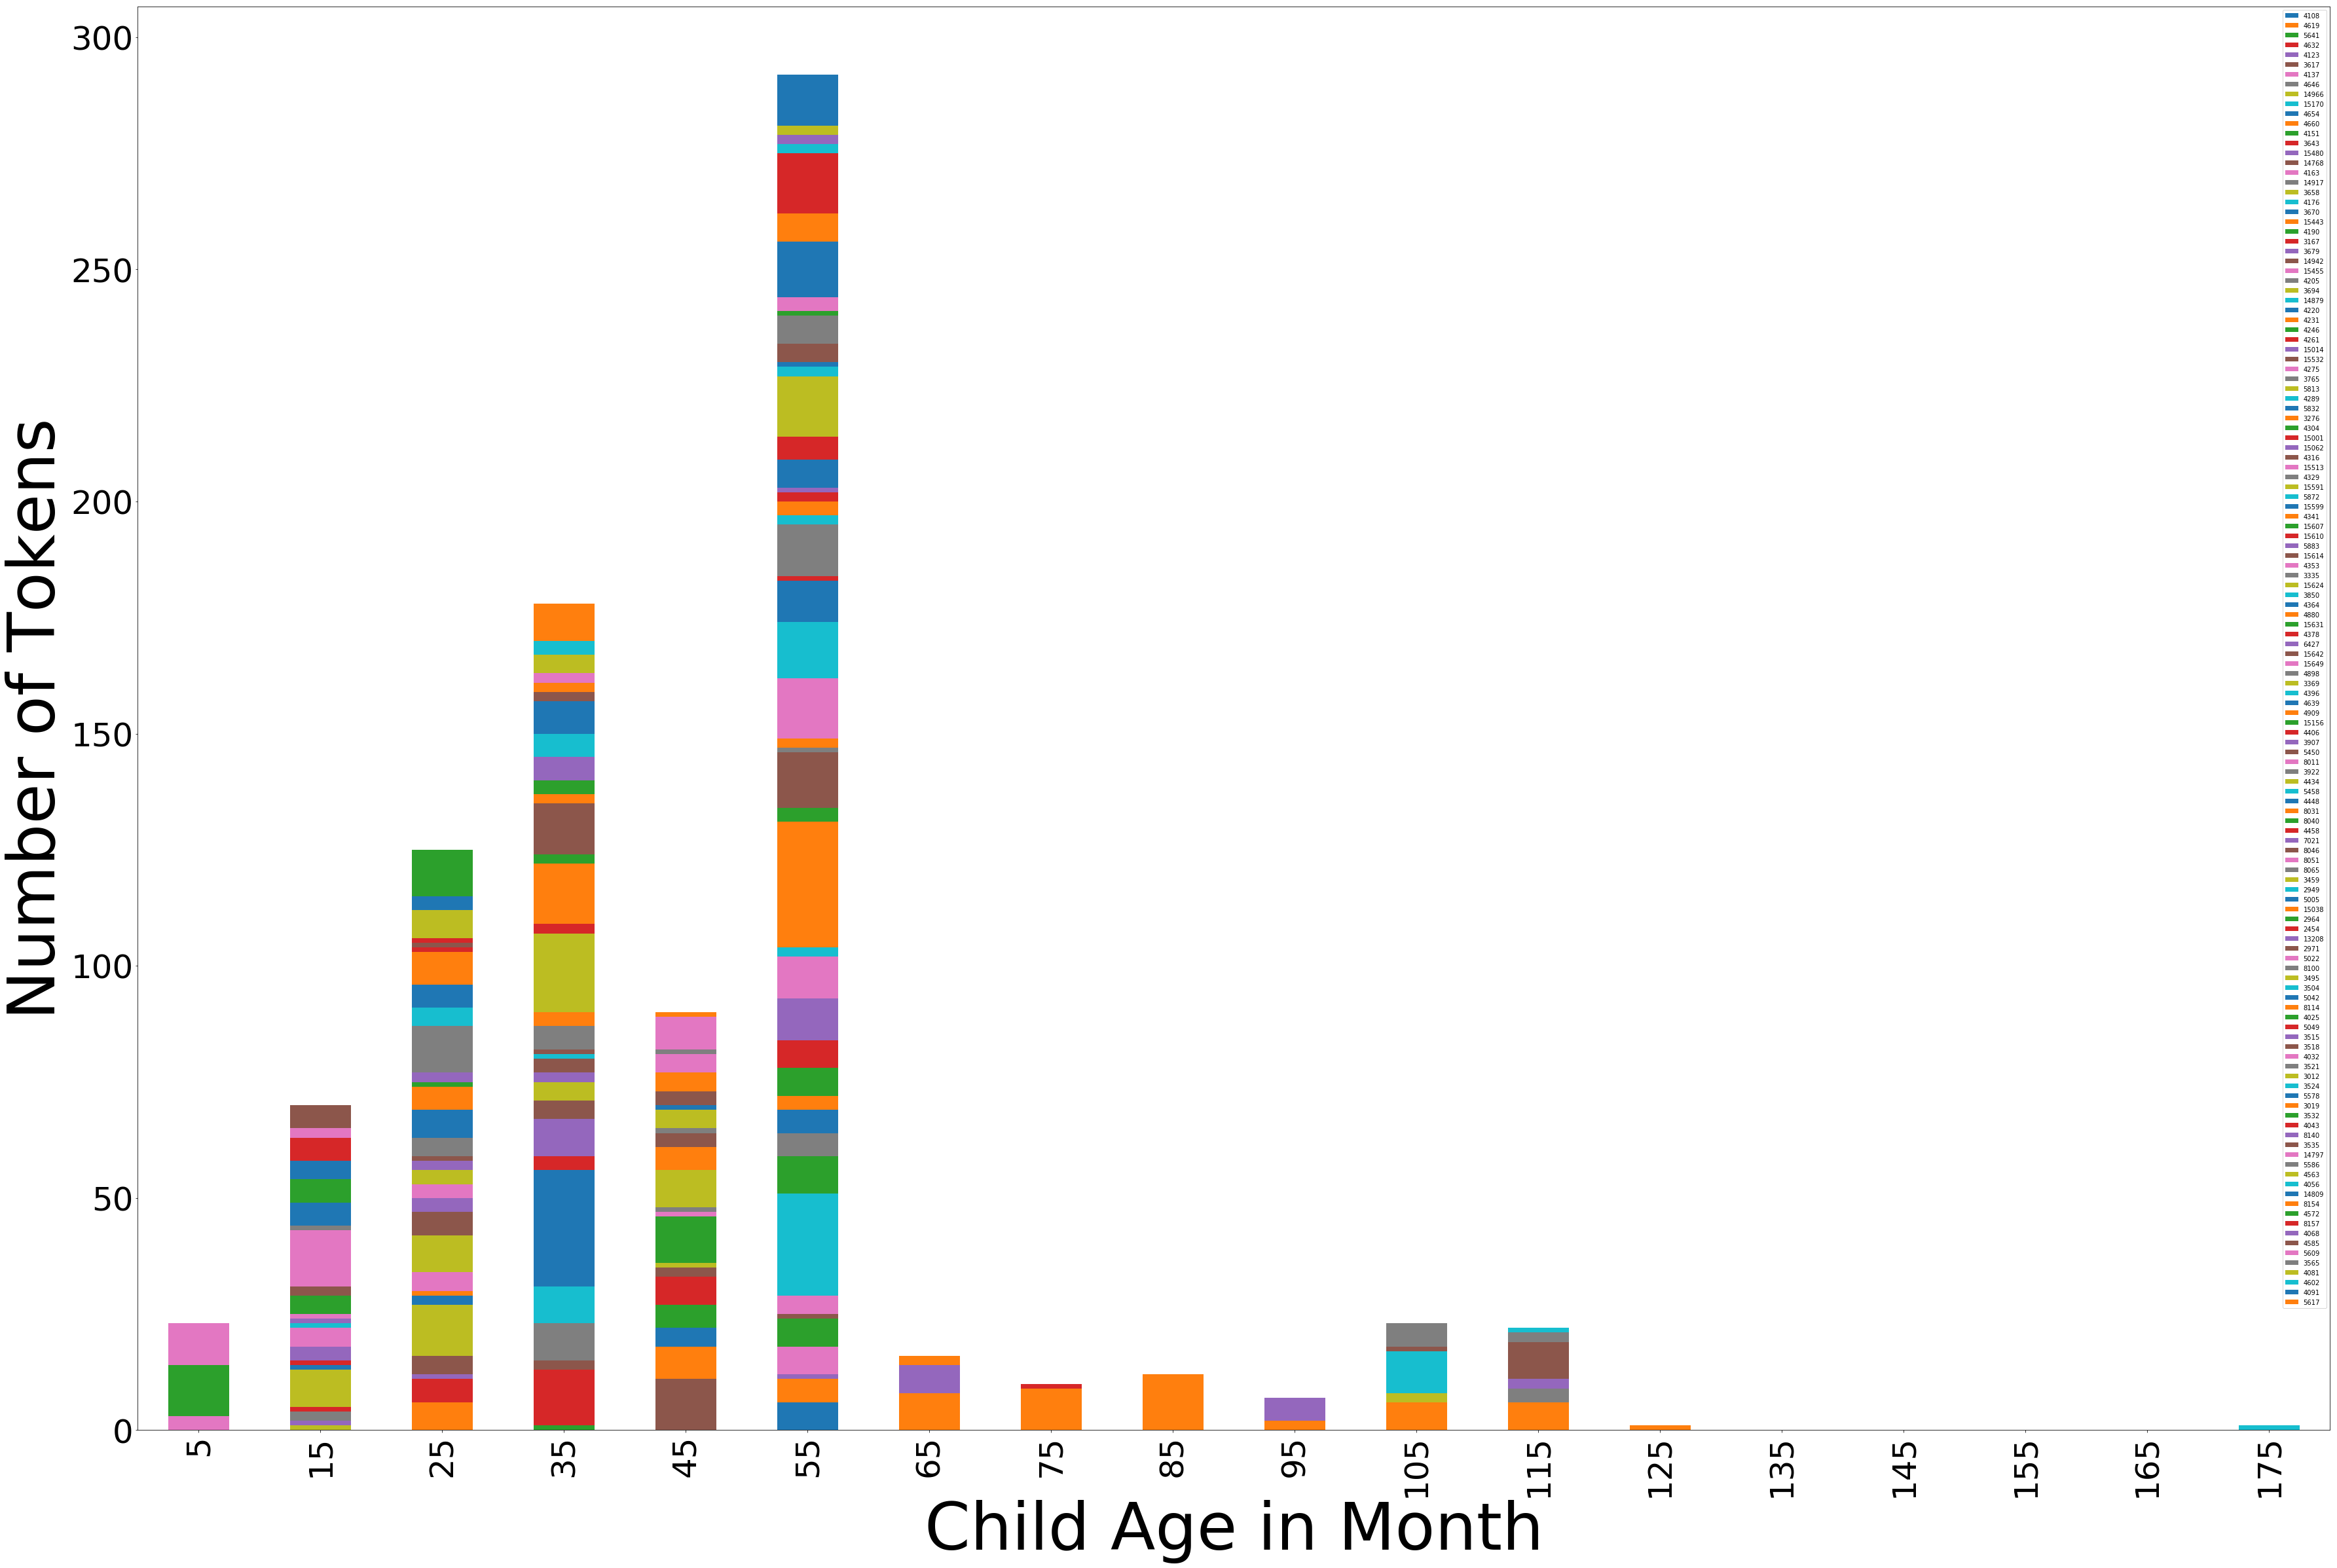

In [5]:
p = dfplot.plot.bar(stacked=True, figsize=(60, 40), fontsize=50)
p.set_ylabel('Number of Tokens', fontsize=100)
p.set_xlabel('Child Age in Month', fontsize=100)
savefig('/Users/anna/Documents/GitHub/Lexical-Complexity-of-Speech1')

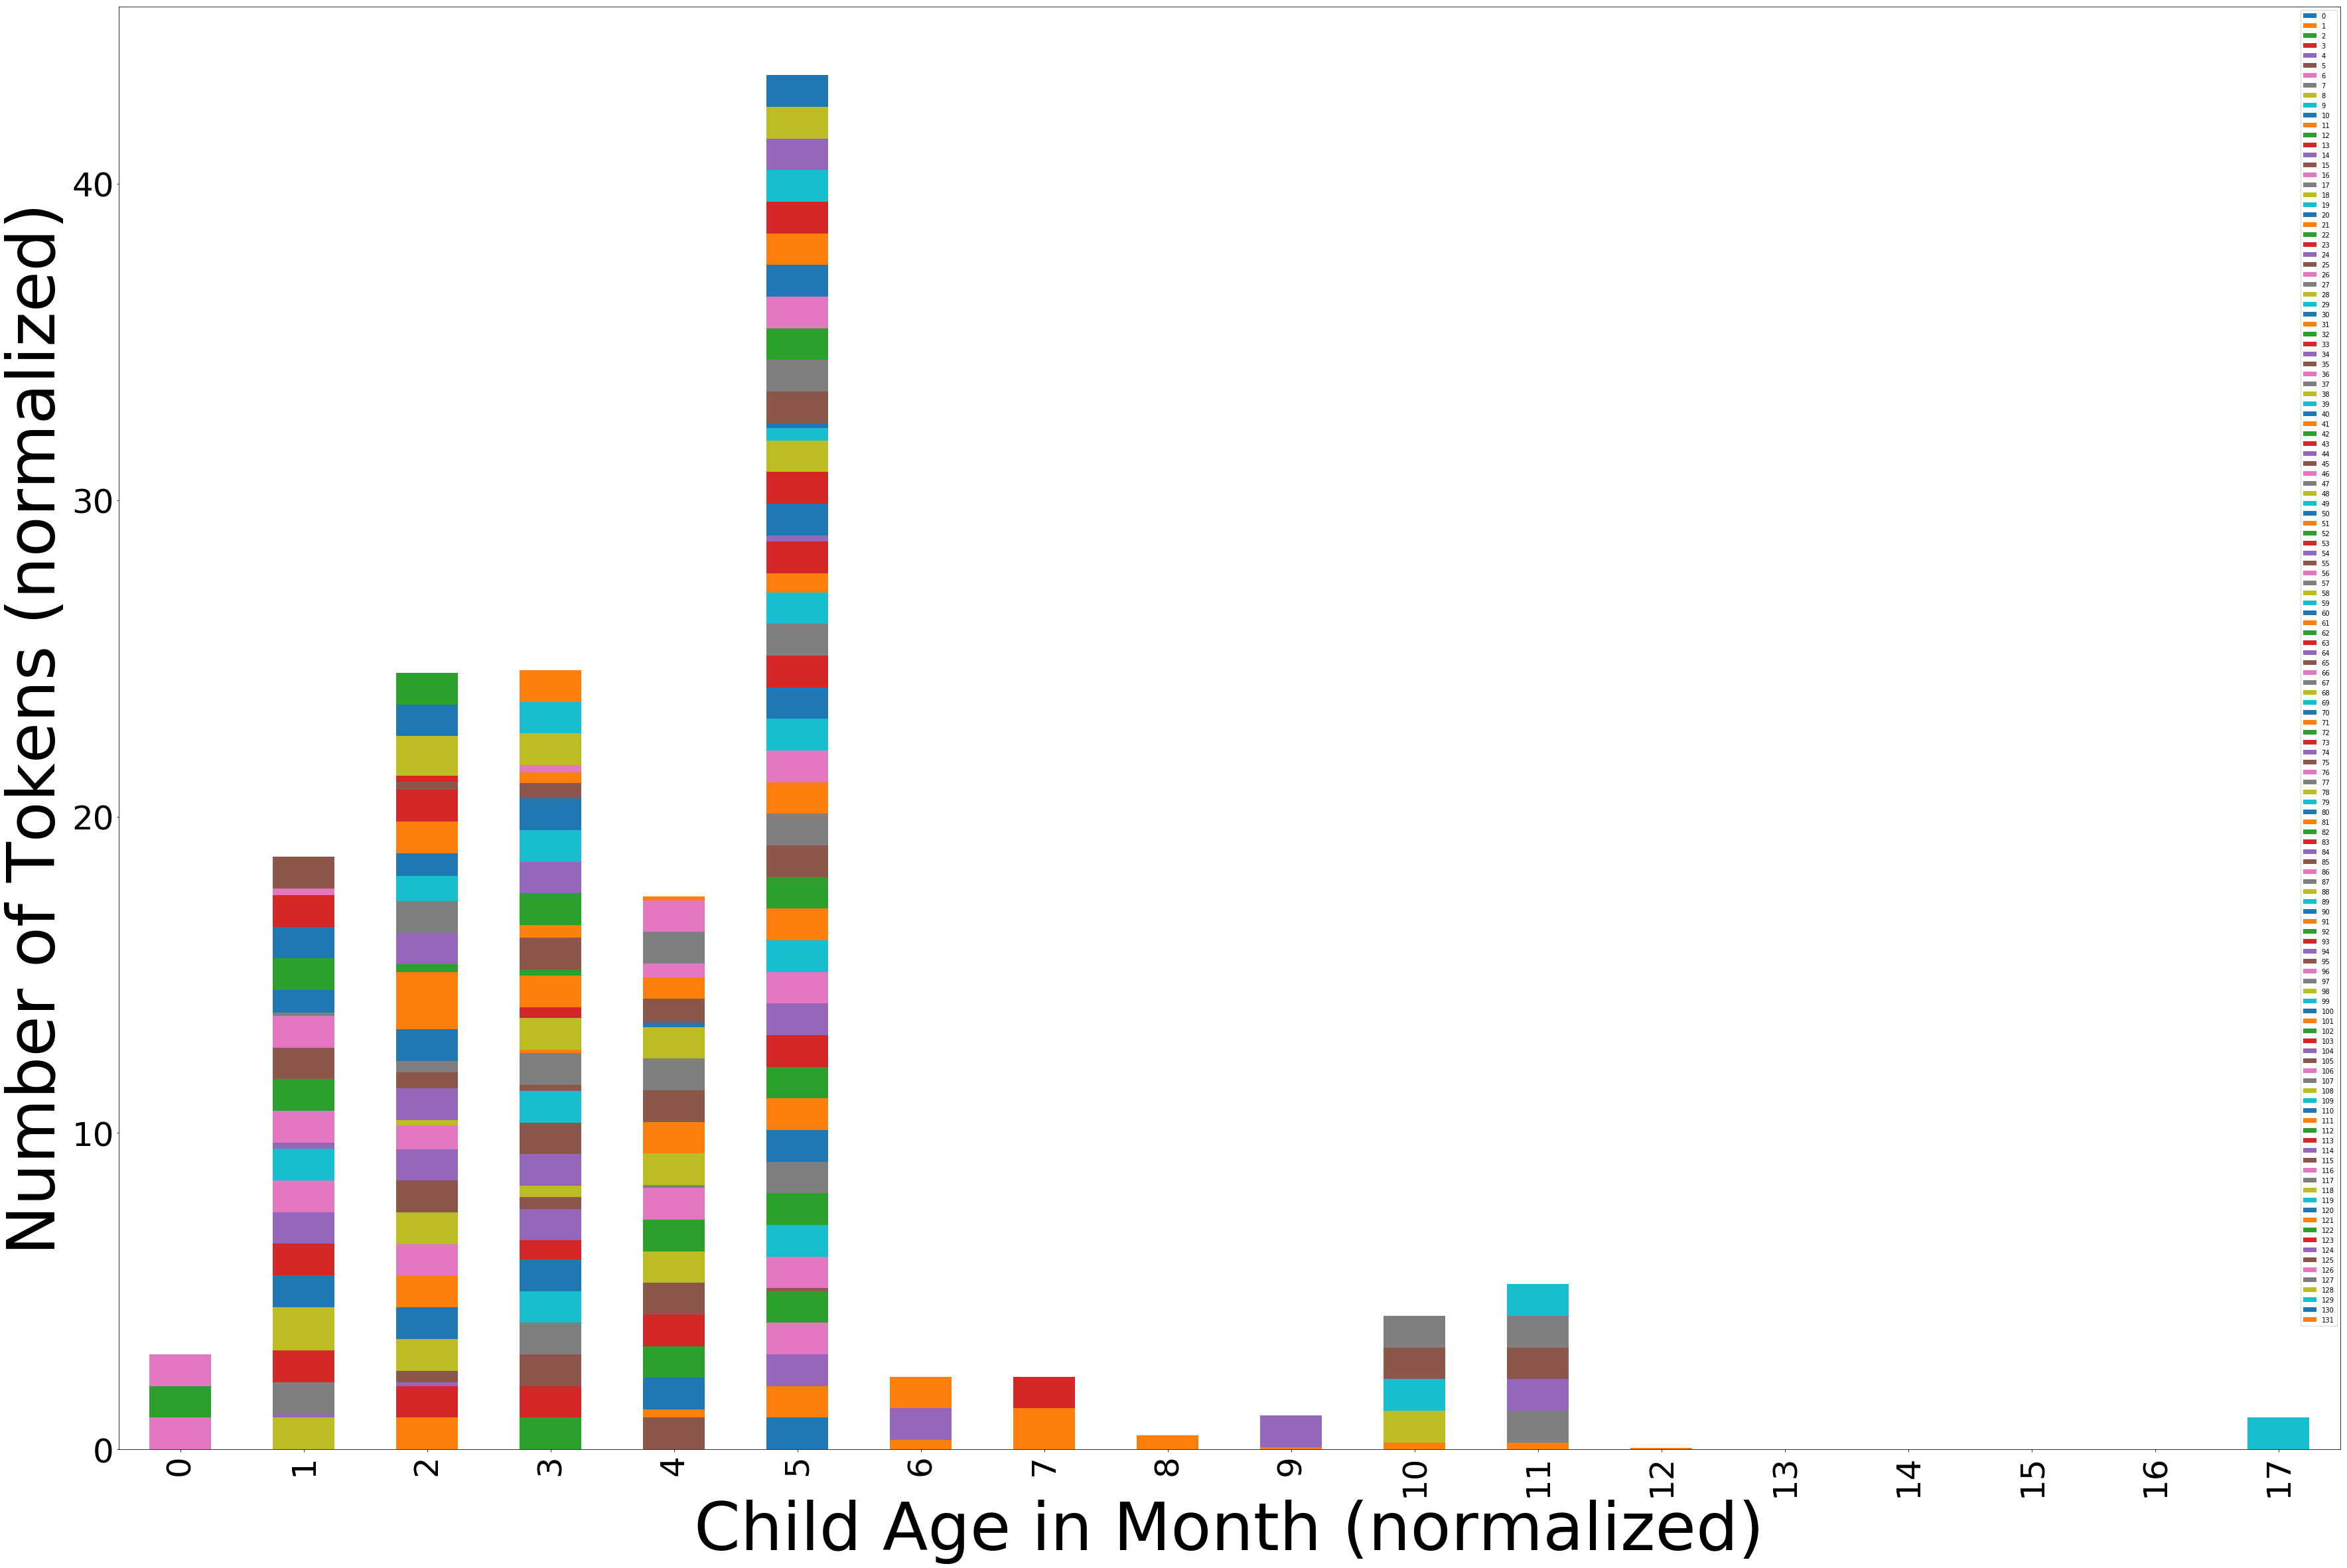

In [6]:
p = df_normalized.plot.bar(stacked=True, figsize=(60, 40), fontsize=50)
p.set_ylabel('Number of Tokens (normalized)', fontsize=100)
p.set_xlabel('Child Age in Month (normalized)', fontsize=100)
savefig('/Users/anna/Documents/GitHub/Lexical-Complexity-of-Speech1_normalized')

In [7]:
df2 = pd.read_csv('/Users/anna/Documents/GitHub/Lexical-Complexity-of-Speech/Get Utterances/cleaned_adultToChild.csv')
dfplot2 = pd.DataFrame(index = range(5, 180, 10), columns = child_id)
kk = 0
for i in range(df2.shape[0]):
    childId = df2['target_child_id'].iloc[i]
    if (str(childId)!= 'nan'):
        if (childId in dfplot2.columns):
            age = df2['target_child_age'].iloc[i]
            numToken = df2['num_tokens'].iloc[i]
            n = 0
            for j in range(len(dfplot.index) - 1):
                if (age >= dfplot2.index[j]) &  (age < dfplot2.index[j+1]):
                    n = j
                    break
            if age >= dfplot2.index[len(dfplot2.index) - 1]:
                n = len(dfplot2.index) - 1
            if str(childId) != 'nan':
                dfplot2[childId].iloc[n] = numToken
dfplot2 = dfplot2.fillna(0)

In [8]:
np_scaled = min_max_scaler.fit_transform(dfplot2)
df_normalized2 = pd.DataFrame(np_scaled)
df_normalized2

,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,130,131
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5,0,'Child Age in Month')

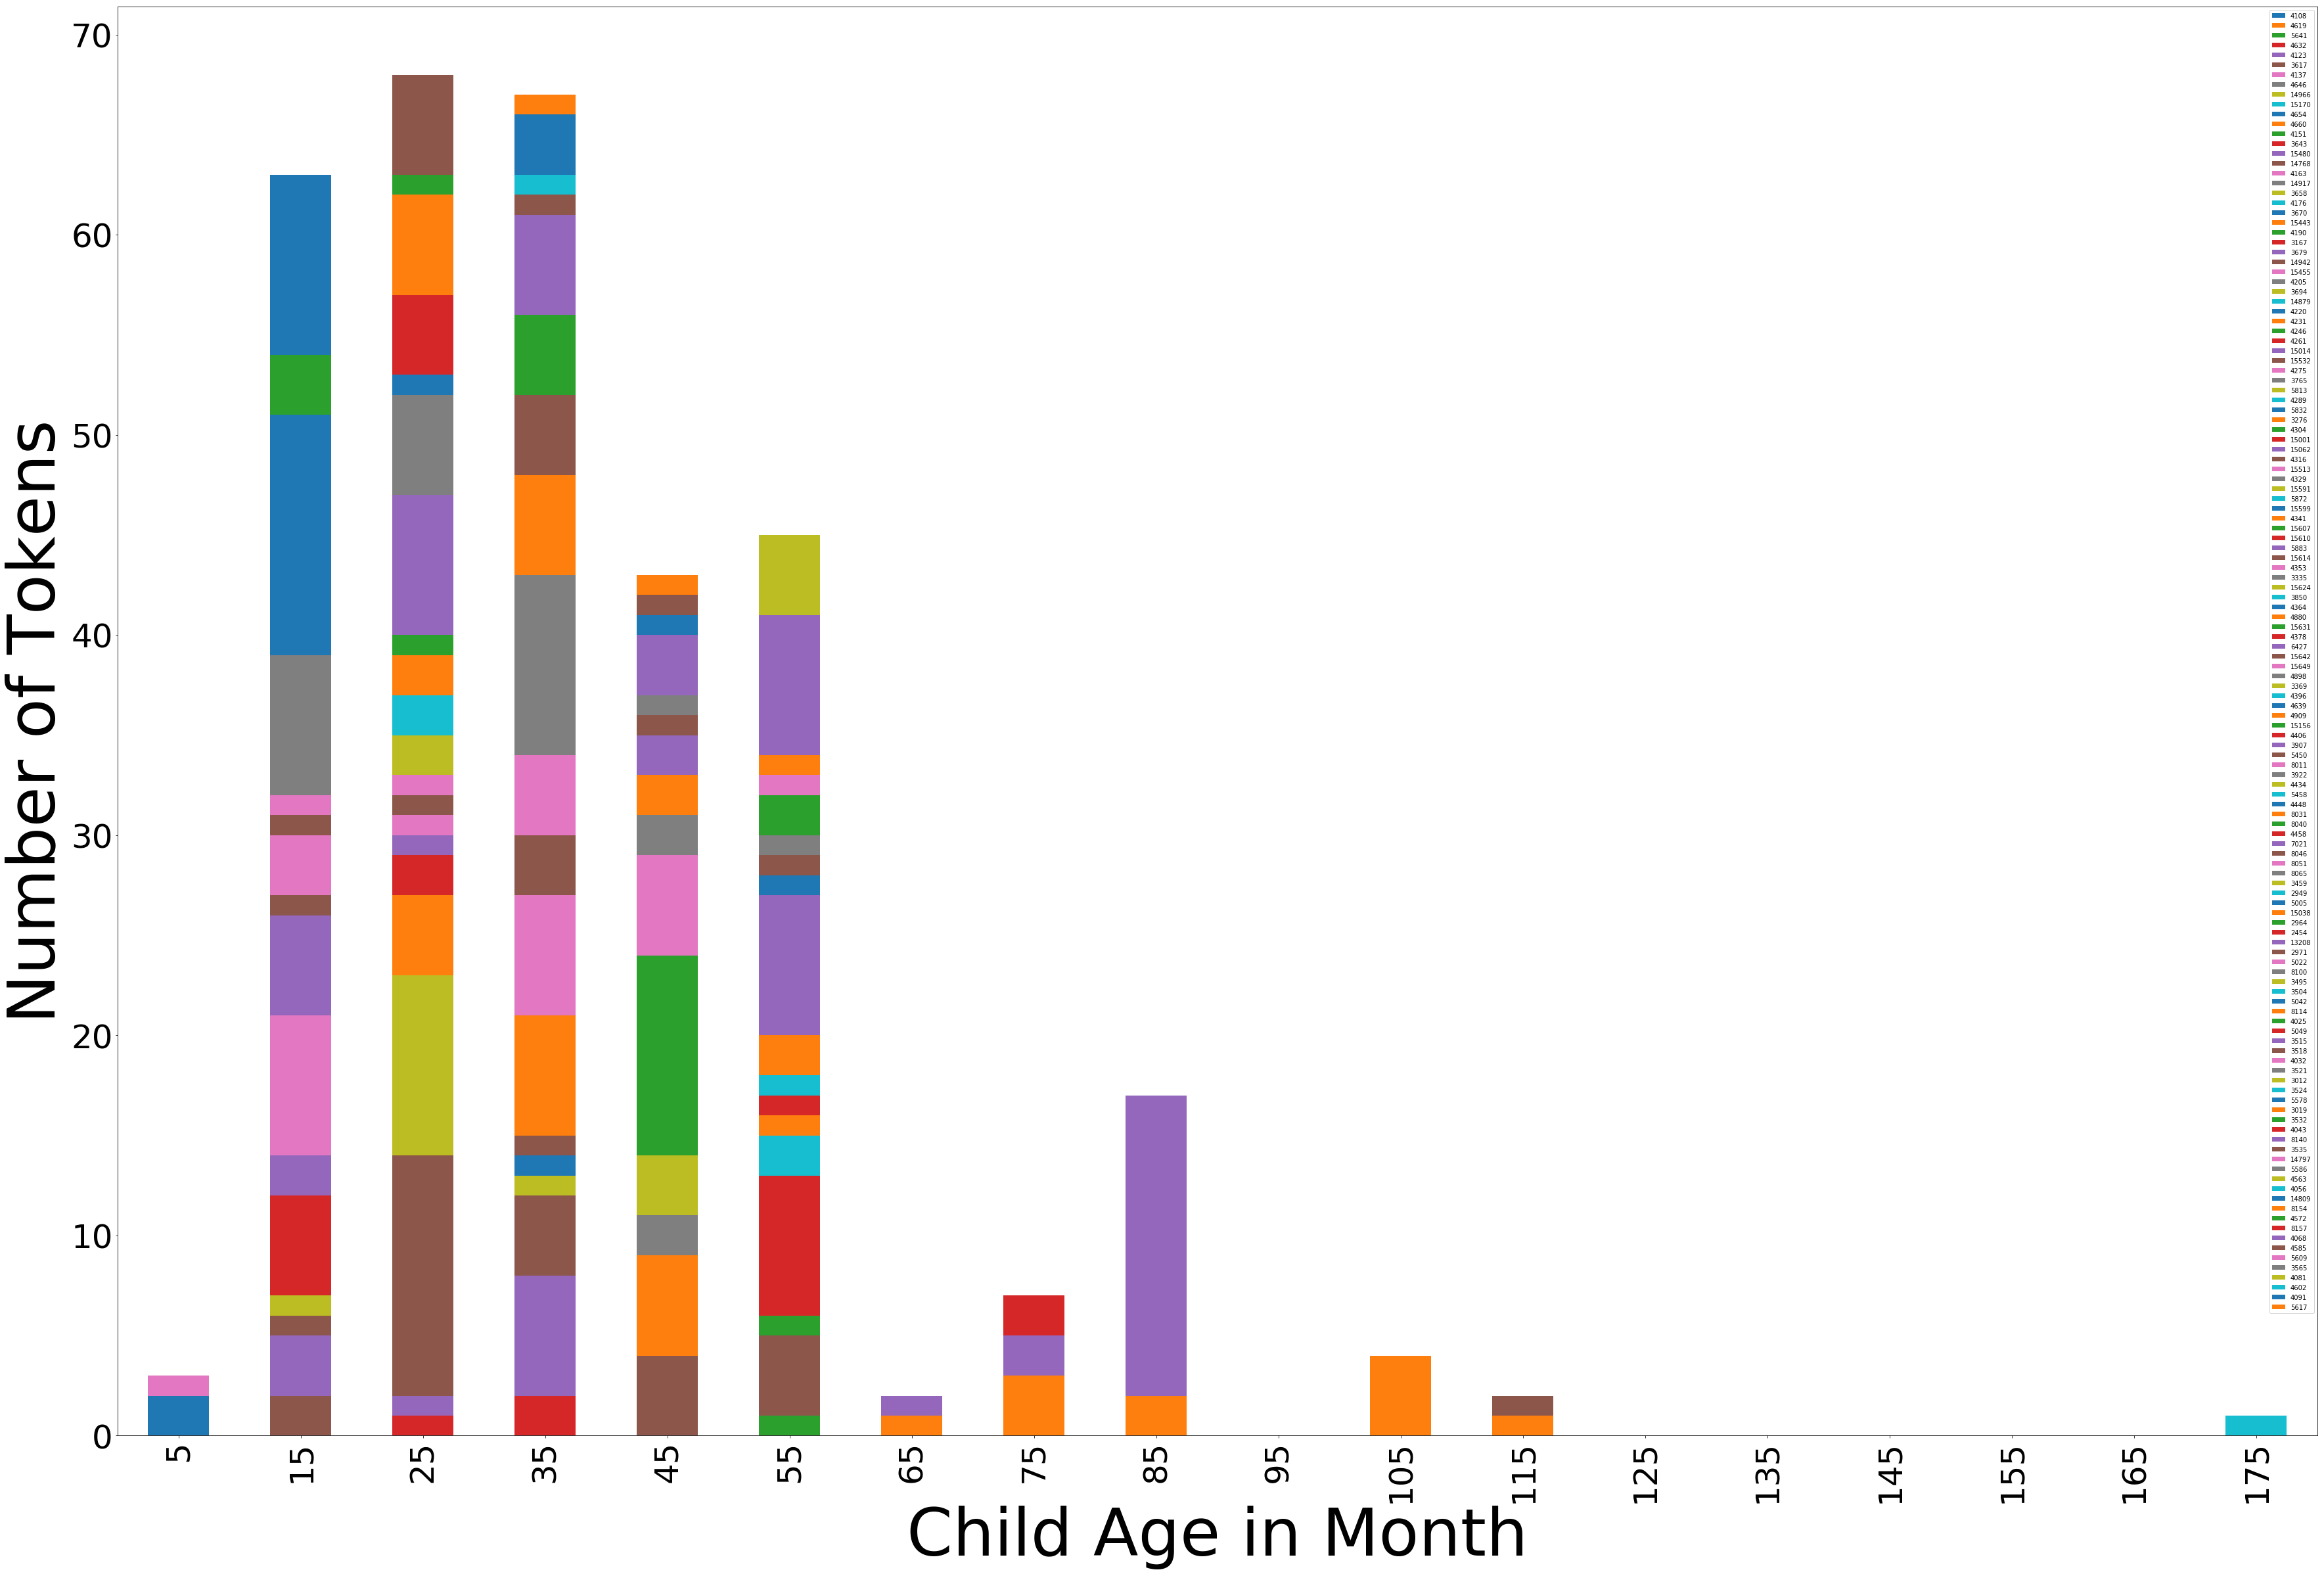

In [9]:
p = dfplot2.plot.bar(stacked=True, figsize=(60, 40), fontsize=50)
p.set_ylabel('Number of Tokens', fontsize=100)
p.set_xlabel('Child Age in Month', fontsize=100)
#savefig('/Users/anna/Documents/GitHub/Lexical-Complexity-of-Speech2')

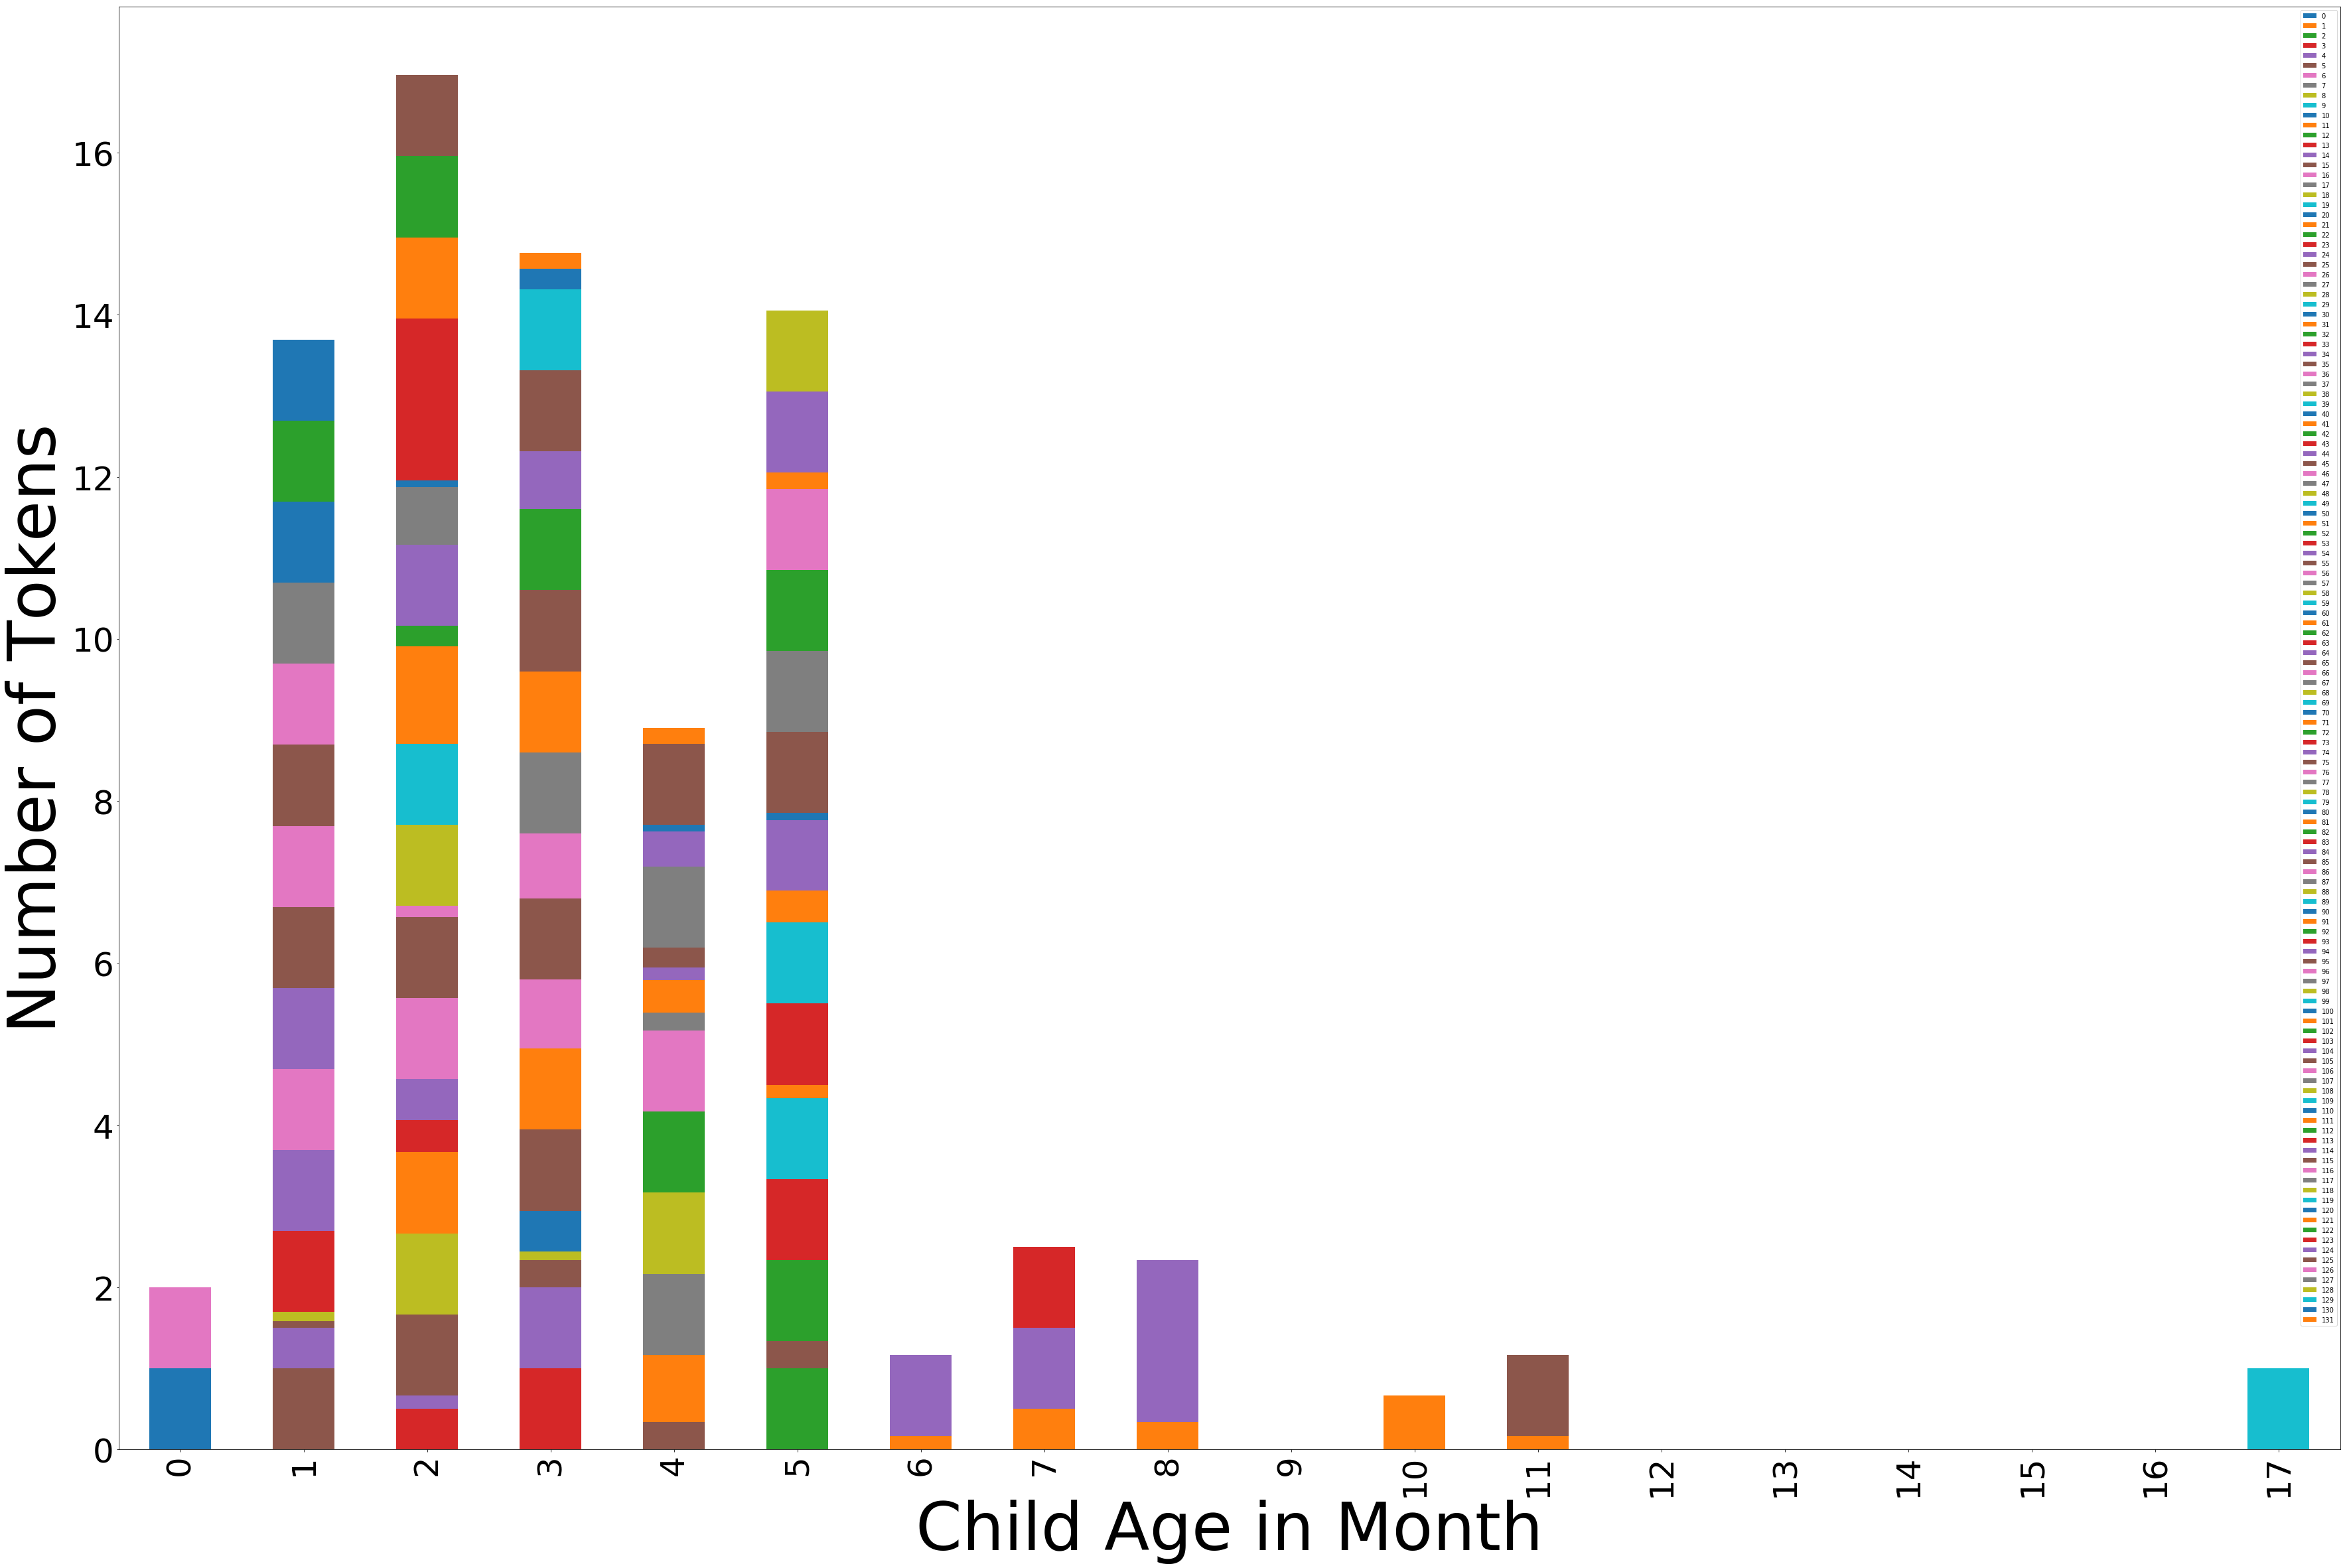

In [10]:
p = df_normalized2.plot.bar(stacked=True, figsize=(60, 40), fontsize=50)
p.set_ylabel('Number of Tokens', fontsize=100)
p.set_xlabel('Child Age in Month', fontsize=100)
savefig('/Users/anna/Documents/GitHub/Lexical-Complexity-of-Speech2_normalized')